In [5]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy as scp
sns.set(style="white", color_codes=True)


In [6]:
data = pd.read_csv("sample_data/hepatitis_csv.csv")

# New Section

In [7]:
data.head()


,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [8]:
data.dtypes


age                  int64
sex                 object
steroid             object
antivirals            bool
fatigue             object
malaise             object
anorexia            object
liver_big           object
liver_firm          object
spleen_palpable     object
spiders             object
ascites             object
varices             object
bilirubin          float64
alk_phosphate      float64
sgot               float64
albumin            float64
protime            float64
histology             bool
class               object
dtype: object

In [9]:
replacements = {'False': 0,
               'True': 1,
               'die': 0,
               'live': 1,
               'NaN': np.nan,
               'female': 0,
               'male': 1}

data.replace(replacements, inplace = True)

In [10]:
data = data.astype(float)

In [18]:
total_of_patients = data.shape[0]
total_of_live_patients = (np.sum(data['class'] == 1)/total_of_patients)*100
total_of_dead_patients = (np.sum(data['class'] == 0)/total_of_patients)*100
print("Living patients:", round(total_of_live_patients,2),"%")
print("Dead patients:", round(total_of_dead_patients,2),"%")


Living patients: 79.35 %
Dead patients: 20.65 %


In [11]:
data.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,85.0,18.0,4.0,NaN,0.0,1.0
1,50.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,135.0,42.0,3.5,NaN,0.0,1.0
2,78.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.7,96.0,32.0,4.0,NaN,0.0,1.0
3,31.0,0.0,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.7,46.0,52.0,4.0,80.0,0.0,1.0
4,34.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,200.0,4.0,NaN,0.0,1.0


In [12]:
numerical_variables = ['age', 'bilirubin', 'protime', 'albumin', 'alk_phosphate', 'sgot']
data[numerical_variables].describe()

,age,bilirubin,protime,albumin,alk_phosphate,sgot
count,155.000000,149.000000,88.000000,139.000000,126.000000,151.00000
mean,41.200000,1.427517,61.852273,3.817266,105.325397,85.89404
std,12.565878,1.212149,22.875244,0.651523,51.508109,89.65089
min,7.000000,0.300000,0.000000,2.100000,26.000000,14.00000
25%,32.000000,0.700000,46.000000,3.400000,74.250000,31.50000
50%,39.000000,1.000000,61.000000,4.000000,85.000000,58.00000
75%,50.000000,1.500000,76.250000,4.200000,132.250000,100.50000
max,78.000000,8.000000,100.000000,6.400000,295.000000,648.00000


In [13]:
categorical_variables = ['sex' , 'steroid', 'antivirals', 'fatigue','malaise','anorexia','liver_big','liver_firm','spleen_palpable',
'spiders','ascites','varices', 'histology']
data[categorical_variables].apply(pd.Series.value_counts)


,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,histology
0.0,139,76,131,54,93,122,25,84,120,99,130,132,85
1.0,16,78,24,100,61,32,120,60,30,51,20,18,70


In [14]:
hepatitis_analysis = data.dropna()
interesting_values_x = ['albumin', 'anorexia','alk_phosphate', 'ascites', 'bilirubin', 'protime', 'sgot', 'class']
hepatitis_analysis = hepatitis_analysis[interesting_values_x]
hepatitis_analysis.head()


,albumin,anorexia,alk_phosphate,ascites,bilirubin,protime,sgot,class
5,4.0,0.0,95.0,0.0,0.9,75.0,28.0,1.0
10,4.4,0.0,78.0,0.0,1.3,85.0,30.0,1.0
11,3.7,0.0,59.0,0.0,1.0,54.0,249.0,1.0
12,3.9,0.0,81.0,0.0,0.9,52.0,60.0,1.0
13,4.9,0.0,57.0,0.0,2.2,78.0,144.0,1.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


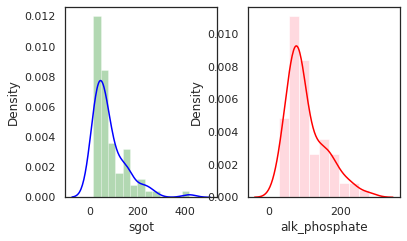

In [15]:
plt.figure(figsize=(6,3.5))
plt.subplot(1, 2, 1)
sns.distplot(hepatitis_analysis['sgot'],
             kde_kws={"color":"blue","lw":1.5,"alpha":0.8},
             hist_kws={"color":"green","alpha":0.3})
plt.subplot(1, 2, 2)
sns.distplot(hepatitis_analysis['alk_phosphate'],
            kde_kws={"color":"red","lw":1.5,"alpha":0.8},
            hist_kws={"color":"pink","alpha":0.6})



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


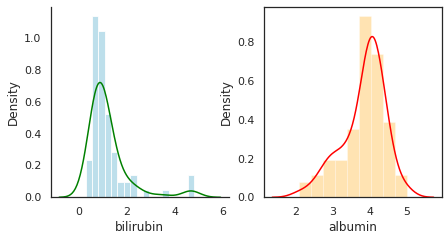

In [17]:
plt.figure(figsize=(7,3.5))
plt.subplot(1, 2, 1)
sns.distplot(hepatitis_analysis['bilirubin'],
             kde_kws={"color":"green","lw":1.5,"alpha":0.8},
             hist_kws={"color":"lightblue","alpha":0.8})
sns.despine()
plt.subplot(1, 2, 2)
sns.distplot(hepatitis_analysis['albumin'], 
             kde_kws={"color":"red","lw":1.5,"alpha":0.8},
             hist_kws={"color":"orange","alpha":0.3})

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


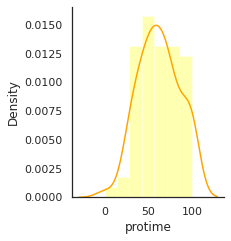

In [18]:
plt.figure(figsize=(6,3.5))
plt.subplot(1, 2, 1)
sns.distplot(hepatitis_analysis['protime'], 
             kde_kws={"color":"orange","lw":1.5,"alpha":0.8},
             hist_kws={"color":"yellow","alpha":0.3})
sns.despine();

In [19]:

hepatitis_analysis[['albumin', 'alk_phosphate', 'bilirubin', 'sgot']] = hepatitis_analysis[['albumin','alk_phosphate', 'bilirubin', 'sgot']].applymap(np.log)
hepatitis_analysis.head()	



,albumin,anorexia,alk_phosphate,ascites,bilirubin,protime,sgot,class
5,1.386294,0.0,4.553877,0.0,-0.105361,75.0,3.332205,1.0
10,1.481605,0.0,4.356709,0.0,0.262364,85.0,3.401197,1.0
11,1.308333,0.0,4.077537,0.0,0.000000,54.0,5.517453,1.0
12,1.360977,0.0,4.394449,0.0,-0.105361,52.0,4.094345,1.0
13,1.589235,0.0,4.043051,0.0,0.788457,78.0,4.969813,1.0


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


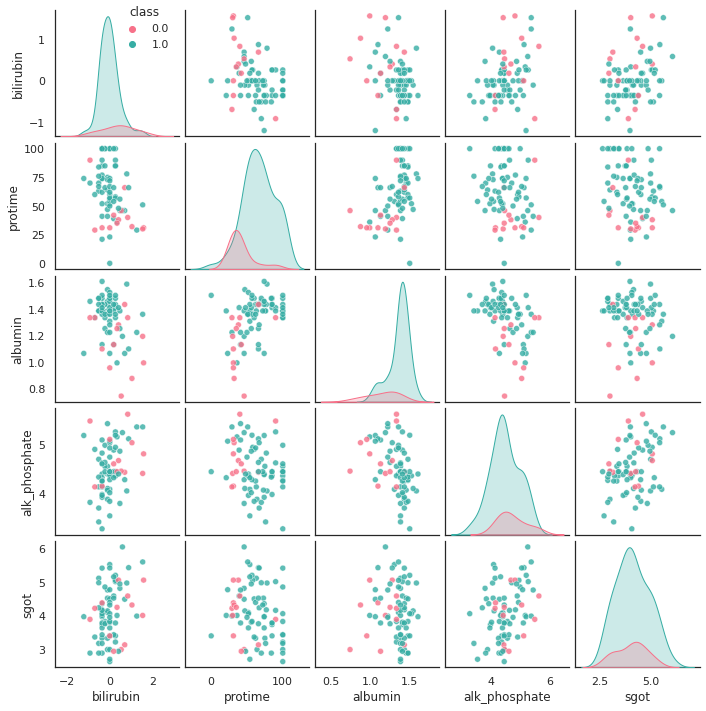

In [20]:
g = sns.pairplot(hepatitis_analysis, x_vars = ['bilirubin', 'protime', 'albumin', 'alk_phosphate', 'sgot'], 
               y_vars = ['bilirubin', 'protime', 'albumin', 'alk_phosphate', 'sgot'], 
               hue = 'class', 
               kind= 'scatter',
               palette = 'husl',
               size = 2,
               plot_kws={"s": 35, "alpha": 0.8})
g.fig.get_children()[-1].set_bbox_to_anchor((0.05, 0.9, 0.18, 0.1));




/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 67.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 65.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.2% of the points cannot be placed; you 

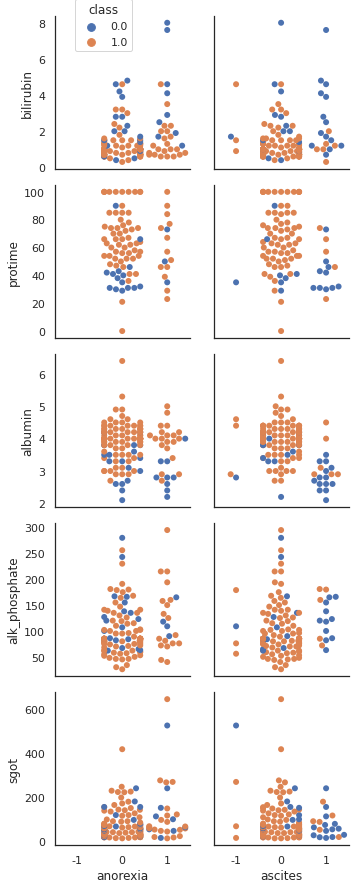

In [24]:
graph = sns.PairGrid(data,
                x_vars=["anorexia", "ascites"],
                 y_vars=['bilirubin', 'protime', 'albumin', 'alk_phosphate', 'sgot'],
                 hue = 'class')
graph.map(sns.swarmplot, s = 6)
graph.add_legend(frameon=True, bbox_to_anchor=(0.33, 0.96));


In [21]:
data[categorical_variables] = data[categorical_variables].apply(lambda x : pd.factorize(x)[0])

In [22]:
corr = data.dropna().corr(method = 'pearson')

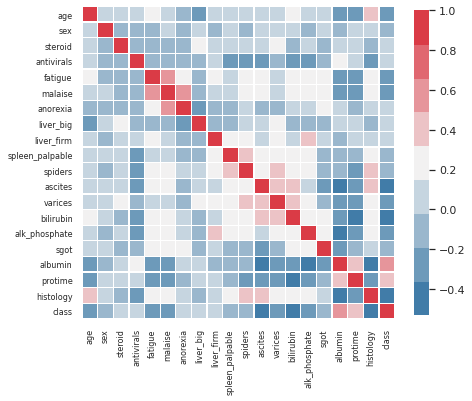

In [23]:
plt.figure(figsize=(7, 7))
cmap = sns.diverging_palette(240, 10, n=9, center = 'light')
sns.heatmap(corr, linewidths=.2, cmap = cmap, cbar_kws={"shrink": .8}, square=True, xticklabels=True, yticklabels=True);
plt.yticks(size= 8, rotation=0) 
plt.xticks(size = 8, rotation = 90);